In [1]:
# Setting warnings off

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Imports

import tensorflow as tf
import numpy as np
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers.core import Dropout
from keras.regularizers import l2
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.python.keras import Sequential
from matplotlib import pyplot as plt
import time

In [4]:
# Data import

from sklearn.model_selection import train_test_split
from tensorflow.python.keras.datasets import cifar10

(X_train_raw, y_train_raw), (X_test, y_test) = cifar10.load_data()

X_train_nf, X_val_nf, y_train_nf, y_val_nf = train_test_split(
        X_train_raw, y_train_raw, test_size=0.2, random_state=42)

X_train_nf = X_train_nf.reshape(X_train_nf.shape[0], 32, 32, 3)
X_val = X_val_nf.reshape(X_val_nf.shape[0], 32, 32, 3)

y_train_nf = to_categorical(y_train_nf)
y_val = to_categorical(y_val_nf)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
y_test = to_categorical(y_test)



In [5]:
X_train_raw[0].shape

(32, 32, 3)

In [6]:
# Variables in the architecture
train_data_usage = [0.50, 0.75, 1]
regularizers_list = ['dropout', 'batchnorm', 'combined']

In [7]:
X_train_nf.shape

(40000, 32, 32, 3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0

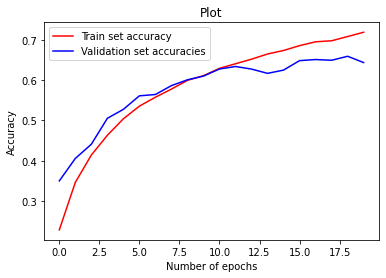

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)       

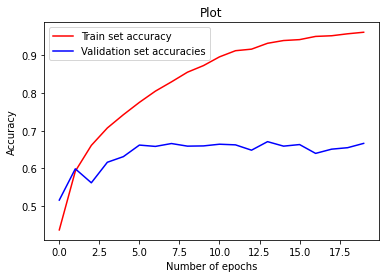

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)       

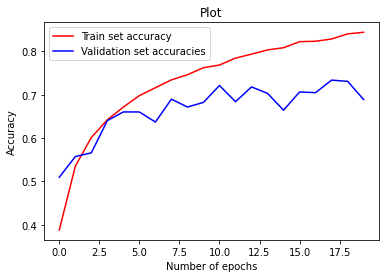

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 6, 6, 64)         

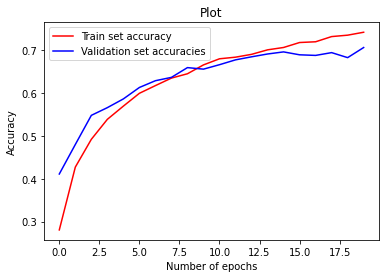

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 12, 12, 64)       

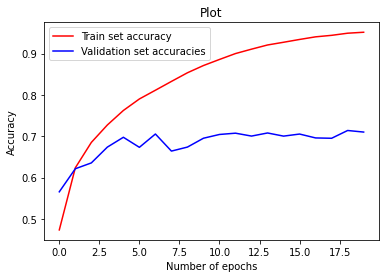

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 64)       

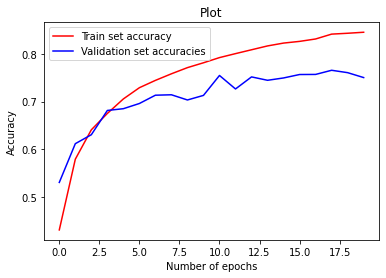

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 6, 6, 64)         

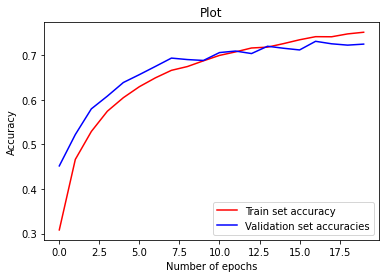

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_20 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_22 (Batc (None, 12, 12, 64)       

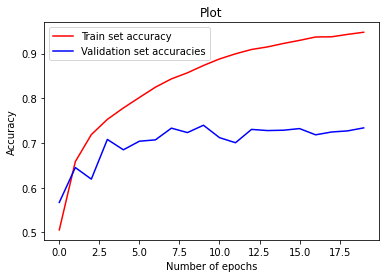

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_25 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_26 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 64)       

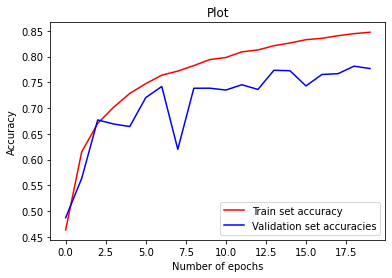

In [8]:
for fraction in train_data_usage:
#     X_train_nf, X_val_nf, y_train_nf, y_val_nf = train_test_split(
#     X_train_raw, y_train_raw, test_size=(1 - val_split), random_state=42)
        
    
#     X_train = X_train_nf.reshape(X_train_nf.shape[0], 32, 32, 3)
#     X_val = X_val_nf.reshape(X_val_nf.shape[0], 32, 32, 3)

#     y_train = to_categorical(y_train_nf)
#     y_val = to_categorical(y_val_nf)
    X_train = X_train_nf[0:round(X_train_nf.shape[0] * fraction)]
    y_train = y_train_nf[0:round(y_train_nf.shape[0] * fraction)]
    
    
    for regularizer in regularizers_list:
        model = Sequential()

        model.add(Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3)))
        if regularizer == 'batchnorm' or regularizer == 'combined':
            model.add(BatchNormalization())

        model.add(Conv2D(32, 3, activation='relu'))
        if regularizer == 'batchnorm' or regularizer == 'combined':
            model.add(BatchNormalization())
        model.add(MaxPooling2D((2,2)))
        
        if regularizer == 'dropout' or regularizer == 'combined':
            model.add(Dropout(0.1))

        model.add(Conv2D(64, 3, activation='relu'))
        if regularizer == 'batchnorm' or regularizer == 'combined':
            model.add(BatchNormalization())
        model.add(MaxPooling2D((2,2)))
        if regularizer == 'dropout' or regularizer == 'combined':
            model.add(Dropout(0.1))
        model.add(Conv2D(64, 3, activation='relu'))
        if regularizer == 'batchnorm' or regularizer == 'combined':
            model.add(BatchNormalization())
        model.add(MaxPooling2D((2,2)))
        if regularizer == 'dropout' or regularizer == 'combined':
            model.add(Dropout(0.1))

        model.add(Flatten())
        model.add(Dense(100, activation='relu'))
        if regularizer == 'batchnorm' or regularizer == 'combined':
            model.add(BatchNormalization())
        if regularizer == 'dropout' or regularizer == 'combined':
            model.add(Dropout(0.1))
        model.add(Dense(10, activation='softmax'))

        # Model summary and training
        model.summary()
        opt = tf.keras.optimizers.Adam(learning_rate=0.001)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        start_time = time.time()
        history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), verbose=0)
        end_time = time.time()
        duration = end_time - start_time

        # Evaluation
        print(f"Model --> Fraction of training data: {fraction*100}%, Regularizer: {regularizer}")
        loss, acc = model.evaluate(X_test, y_test, verbose =0)

        print(f"Time taken to train the model = {duration:.2f} seconds")
        print(f"Accuracy in test set : {100 * acc:.2f}")

        # Plotting
        plt.figure()
        plt.plot(history.history['accuracy'], color='red', label='Train set accuracy')

        plt.plot(history.history['val_accuracy'], color='blue', label='Validation set accuracies')
        plt.title("Plot")
        plt.ylabel("Accuracy")
        plt.xlabel("Number of epochs")

        plt.legend()
        plt.show()